In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r"C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\Horse_race\combined_data\selected_features2.csv")

df.head(4)

,horseName,age,trainerName,jockeyName,RPR,course,weight,TR,isFav,runners,distance,hurdles,res_place,position
0,Combermere,6.0,R G Frost,J Frost,111.0,Exeter,69,94.0,0,14,3m1f,19 fences,1.0,1
1,Royal Battery,6.0,D H Barons,S Earle,101.0,Exeter,69,88.0,0,14,3m1f,19 fences,1.0,2
2,Just So,7.0,J D Roberts,S Burrough,86.0,Exeter,66,71.0,0,14,3m1f,19 fences,1.0,3
3,Mandraki Shuffle,8.0,Oliver Sherwood,M Richards,66.0,Exeter,69,65.0,0,14,3m1f,19 fences,0.0,4


In [3]:
df.shape

(4107315, 14)

In [4]:
df.columns

Index(['horseName', 'age', 'trainerName', 'jockeyName', 'RPR', 'course',
       'weight', 'TR', 'isFav', 'runners', 'distance', 'hurdles', 'res_place',
       'position'],
      dtype='object')

In [5]:
df.dtypes

horseName       object
age            float64
trainerName     object
jockeyName      object
RPR            float64
course          object
weight           int64
TR             float64
isFav            int64
runners          int64
distance        object
hurdles         object
res_place      float64
position         int64
dtype: object

In [6]:
len(df['horseName'].unique())

371869

In [7]:
len(df['trainerName'].unique())

18449

In [8]:
len(df['jockeyName'].unique())

17722

In [9]:
df['isFav'].unique()

array([0, 1], dtype=int64)

In [10]:
df['res_place'].unique()

array([1., 0.])

In [11]:
len(df['course'].unique())

440

In [12]:
df['position'].unique()

array([ 1,  2,  3,  4,  5,  6, 40,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39,  0], dtype=int64)

In [13]:
df.describe()

,age,RPR,weight,TR,isFav,runners,res_place,position
count,4.107006e+06,3.242438e+06,4.107315e+06,2.425705e+06,4.107315e+06,4.107315e+06,4.107315e+06,4.107315e+06
mean,4.913815e+00,7.231039e+01,6.094580e+01,5.208596e+01,1.044334e-01,1.205911e+01,2.697716e-01,8.532958e+00
std,2.246112e+00,2.871247e+01,7.186899e+00,2.744355e+01,3.058220e-01,4.476202e+00,4.438411e-01,9.464667e+00
min,-1.700000e+01,-1.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,5.300000e+01,5.500000e+01,3.200000e+01,0.000000e+00,9.000000e+00,0.000000e+00,3.000000e+00
50%,4.000000e+00,7.200000e+01,5.800000e+01,5.000000e+01,0.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00
75%,6.000000e+00,9.300000e+01,6.800000e+01,7.000000e+01,0.000000e+00,1.500000e+01,1.000000e+00,1.000000e+01
max,2.700000e+01,1.910000e+02,1.320000e+02,1.860000e+02,1.000000e+00,4.000000e+01,1.000000e+00,4.000000e+01


In [14]:
df.loc[df['age'] < 0, 'age'] = 0

In [15]:
df.describe()

,age,RPR,weight,TR,isFav,runners,res_place,position
count,4.107006e+06,3.242438e+06,4.107315e+06,2.425705e+06,4.107315e+06,4.107315e+06,4.107315e+06,4.107315e+06
mean,4.914136e+00,7.231039e+01,6.094580e+01,5.208596e+01,1.044334e-01,1.205911e+01,2.697716e-01,8.532958e+00
std,2.244773e+00,2.871247e+01,7.186899e+00,2.744355e+01,3.058220e-01,4.476202e+00,4.438411e-01,9.464667e+00
min,0.000000e+00,-1.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,5.300000e+01,5.500000e+01,3.200000e+01,0.000000e+00,9.000000e+00,0.000000e+00,3.000000e+00
50%,4.000000e+00,7.200000e+01,5.800000e+01,5.000000e+01,0.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00
75%,6.000000e+00,9.300000e+01,6.800000e+01,7.000000e+01,0.000000e+00,1.500000e+01,1.000000e+00,1.000000e+01
max,2.700000e+01,1.910000e+02,1.320000e+02,1.860000e+02,1.000000e+00,4.000000e+01,1.000000e+00,4.000000e+01


# Finding and Filling Missing Values

In [16]:
df.isnull().sum()

horseName            0
age                309
trainerName       2850
jockeyName         125
RPR             864877
course               0
weight               0
TR             1681610
isFav                0
runners              0
distance             0
hurdles        2880705
res_place            0
position             0
dtype: int64

In [17]:
df_missingpercent = round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)
df_missingpercent

hurdles        70.14
TR             40.94
RPR            21.06
trainerName     0.07
age             0.01
jockeyName      0.00
horseName       0.00
course          0.00
weight          0.00
isFav           0.00
runners         0.00
distance        0.00
res_place       0.00
position        0.00
dtype: float64

In [18]:
# Calculate median of TR where res_place is 0
tr_zeros = ((df['TR'].isna()) & (df['res_place'] == 0)).sum()

In [19]:
print(tr_zeros)

1392745


In [20]:
# Fill NaN values in TR where res_place is 0 with 0
df.loc[df['res_place'] == 0, 'TR'] = df.loc[df['res_place'] == 0, 'TR'].fillna(0)

In [21]:
df_missingpercent = round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)
df_missingpercent

hurdles        70.14
RPR            21.06
TR              7.03
trainerName     0.07
age             0.01
jockeyName      0.00
horseName       0.00
course          0.00
weight          0.00
isFav           0.00
runners         0.00
distance        0.00
res_place       0.00
position        0.00
dtype: float64

In [22]:
# Calculate median of TR where res_place is 1
median_tr = df.loc[df['res_place'] == 1, 'TR'].median()

In [23]:
# filling tr with median of horse when placed in race
df['TR'].fillna(median_tr, inplace=True)

In [24]:
# Filling missing values of age
df['age'].fillna(median_tr, inplace=True)

In [25]:
# Drop rows where trainerName or jockeyName is missing
df.dropna(subset=['trainerName', 'jockeyName'], inplace=True)

In [26]:
df.isnull().sum()

horseName            0
age                  0
trainerName          0
jockeyName           0
RPR             862990
course               0
weight               0
TR                   0
isFav                0
runners              0
distance             0
hurdles        2878583
res_place            0
position             0
dtype: int64

In [27]:
df.drop(columns = ['RPR', 'hurdles','horseName'], axis = 0, inplace = True)

In [28]:
df.isnull().sum()

age            0
trainerName    0
jockeyName     0
course         0
weight         0
TR             0
isFav          0
runners        0
distance       0
res_place      0
position       0
dtype: int64

In [29]:
df.dtypes

age            float64
trainerName     object
jockeyName      object
course          object
weight           int64
TR             float64
isFav            int64
runners          int64
distance        object
res_place      float64
position         int64
dtype: object

In [30]:
df['distance'].unique()

array(['3m1f', '2m', '1m7½f', '2m6f', '2m1f', '6f', '3m1½f', '1m', '2m2f',
       '3m', '2m3f', '2m4f', '7f', '1m3f', '2m4½f', '4m', '3m½f', '1m6f',
       '1m4f', '3m2½f', '2m5f', '1m2f', '3m4f', '2m3½f', '2m½f', '2m7f',
       '3m2f', '5f', '3m5f', '2m5½f', '3m6f', '1m5f', '2m7½f', '2m1½f',
       '2m6½f', '4m½f', '2m2½f', '3m3f', '1m6½f', '1m1f', '1m4½f', '7½f',
       '1m½f', '1m7f', '5½f', '4m4f', '1m2½f', '1m5½f', '4m2f', '1m3½f',
       '1m1½f', '6½f', '3m3½f', '4m2½f', '4m3f', '3m4½f', '3m5½f', '4m1f',
       '3m7f', '4m1½f', '3m6½f', '3m7½f', '4f', '4½f', '4m4½f'],
      dtype=object)

In [31]:
import pandas as pd

def convert_fractional_furlongs(furlong_str):
    """Convert fractional furlongs to decimal."""
    if '½' in furlong_str:
        return 0.5
    elif '¼' in furlong_str:
        return 0.25
    elif '¾' in furlong_str:
        return 0.75
    else:
        return 0.0

def convert_distance_to_miles(distance):
    """Convert distance strings in miles and furlongs to decimal miles."""
    if 'm' in distance and 'f' in distance:
        miles, furlongs = distance.split('m')
        furlongs = furlongs.replace('f', '')
        miles = float(miles) if miles else 0.0
        if '½' in furlongs or '¼' in furlongs or '¾' in furlongs:
            fractional_furlong = convert_fractional_furlongs(furlongs[-1])
            furlongs = furlongs[:-1]
            furlongs = float(furlongs) + fractional_furlong if furlongs else fractional_furlong
        else:
            furlongs = float(furlongs) if furlongs else 0.0
        return miles + furlongs / 8
    elif 'm' in distance:
        miles = distance.replace('m', '')
        return float(miles)
    elif 'f' in distance:
        furlongs = distance.replace('f', '')
        if '½' in furlongs or '¼' in furlongs or '¾' in furlongs:
            fractional_furlong = convert_fractional_furlongs(furlongs[-1])
            furlongs = furlongs[:-1]
            furlongs = float(furlongs) + fractional_furlong if furlongs else fractional_furlong
        else:
            furlongs = float(furlongs) if furlongs else 0.0
        return furlongs / 8
    else:
        return np.nan


In [32]:
df.columns

Index(['age', 'trainerName', 'jockeyName', 'course', 'weight', 'TR', 'isFav',
       'runners', 'distance', 'res_place', 'position'],
      dtype='object')

In [33]:
df['distance_in_miles'] = df['distance'].apply(convert_distance_to_miles)

In [34]:
df.columns

Index(['age', 'trainerName', 'jockeyName', 'course', 'weight', 'TR', 'isFav',
       'runners', 'distance', 'res_place', 'position', 'distance_in_miles'],
      dtype='object')

In [35]:
df.dtypes

age                  float64
trainerName           object
jockeyName            object
course                object
weight                 int64
TR                   float64
isFav                  int64
runners                int64
distance              object
res_place            float64
position               int64
distance_in_miles    float64
dtype: object

# Converting data types and dropping unwated columns

In [36]:
df.head()

,age,trainerName,jockeyName,course,weight,TR,isFav,runners,distance,res_place,position,distance_in_miles
0,6.0,R G Frost,J Frost,Exeter,69,94.0,0,14,3m1f,1.0,1,3.125
1,6.0,D H Barons,S Earle,Exeter,69,88.0,0,14,3m1f,1.0,2,3.125
2,7.0,J D Roberts,S Burrough,Exeter,66,71.0,0,14,3m1f,1.0,3,3.125
3,8.0,Oliver Sherwood,M Richards,Exeter,69,65.0,0,14,3m1f,0.0,4,3.125
4,8.0,T B Hallett,P Richards,Exeter,69,45.0,0,14,3m1f,0.0,5,3.125


In [37]:
df.drop(columns = ['distance'], axis = 0, inplace = True)


In [38]:
df['trainerName'].value_counts()

trainerName
Mark Johnston                                    30685
Richard Hannon Snr                               28053
Richard Fahey                                    25176
Mick Channon                                     23803
Tim Easterby                                     22013
A P O'Brien                                      19453
David Evans                                      18463
Gary Moore                                       18195
D K Weld                                         17361
W P Mullins                                      16516
Jonjo O'Neill                                    16413
Michael Easterby                                 16123
J S Bolger                                       15939
John Gosden                                      15828
Philip Hobbs                                     15755
Noel Meade                                       15612
M C Pipe                                         15518
Nigel Twiston-Davies                             1458

In [39]:
df['jockeyName'].value_counts()

jockeyName
Joe Fanning                            21646
Jimmy Quinn                            21258
Richard Johnson                        20910
Dane O'Neill                           18048
Richard Hughes                         17683
A P McCoy                              17590
Frankie Dettori                        17514
Franny Norton                          17216
Kieren Fallon                          17005
Luke Morris                            16820
Steve Drowne                           16700
Paul Hanagan                           16295
Seb Sanders                            16009
Jamie Spencer                          15714
Martin Dwyer                           15150
Graham Lee                             15147
Jimmy Fortune                          15114
Jim Crowley                            14961
Ryan Moore                             14757
Neil Callan                            14454
Tom Eaves                              14406
Robert Winston                         14399

In [40]:
df['course'].value_counts()

course
Wolverhampton (AW)                143506
Lingfield (AW)                    124198
Southwell (AW)                    103212
Kempton (AW)                       79655
Doncaster                          64082
Newbury                            61732
Haydock                            55357
Leopardstown (IRE)                 54990
Leicester                          54775
Deauville (FR)                     53576
Curragh (IRE)                      53182
Fairyhouse (IRE)                   53117
Windsor                            52432
Chepstow                           50570
Catterick                          50340
Nottingham                         50089
Ayr                                49852
Ascot                              49350
Sandown                            47283
Newcastle                          46833
Navan (IRE)                        46183
Newmarket                          45601
Warwick                            45427
Punchestown (IRE)                  45025
Musselbur

In [41]:
df['position'].value_counts()

position
1     395704
2     395011
3     393018
4     384883
5     365060
6     336053
7     300419
40    283977
8     261585
9     222405
10    185622
11    148651
12    118443
13     89714
14     67425
15     47366
16     34207
17     22278
18     16115
19     10664
20      7614
21      4819
22      3694
23      2655
24      1935
25      1390
26      1032
27       779
0        570
28       538
29       345
30       184
31        69
32        49
33        32
34        16
35        11
36         6
37         3
38         3
39         2
Name: count, dtype: int64

In [42]:
df2 = df.copy()

# EDA

In [43]:
categorical_columns = ['isFav','res_place', 'position']

In [44]:
for variable in categorical_columns:
    print(df2[variable].value_counts())
    print("~"*50)

isFav
0    3675589
1     428757
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
res_place
0.0    2996791
1.0    1107555
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
position
1     395704
2     395011
3     393018
4     384883
5     365060
6     336053
7     300419
40    283977
8     261585
9     222405
10    185622
11    148651
12    118443
13     89714
14     67425
15     47366
16     34207
17     22278
18     16115
19     10664
20      7614
21      4819
22      3694
23      2655
24      1935
25      1390
26      1032
27       779
0        570
28       538
29       345
30       184
31        69
32        49
33        32
34        16
35        11
36         6
37         3
38         3
39         2
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [45]:
# Modify the 'position' column
df2['position'] = df2['position'].apply(lambda x: x if x <= 15 else 16)

In [46]:
df2['position'].value_counts()

position
1     395704
2     395011
3     393018
16    392417
4     384883
5     365060
6     336053
7     300419
8     261585
9     222405
10    185622
11    148651
12    118443
13     89714
14     67425
15     47366
0        570
Name: count, dtype: int64

In [47]:
# Drop rows where position is 0
df2 = df2[df2['position'] != 0]

In [48]:
# Calculate counts of each category
counts = df2['trainerName'].value_counts()

threshold = 1000

# Identify categories with counts below threshold
rare_categories = counts[counts < threshold].index

# Replace rare categories with 'Other'
df2.loc[df2['trainerName'].isin(rare_categories), 'trainerName'] = 'Other'

In [49]:
df2['trainerName'].value_counts()

trainerName
Other                                       1054162
Mark Johnston                                 30685
Richard Hannon Snr                            28053
Richard Fahey                                 25176
Mick Channon                                  23803
Tim Easterby                                  22013
A P O'Brien                                   19453
David Evans                                   18463
Gary Moore                                    18195
D K Weld                                      17361
W P Mullins                                   16516
Jonjo O'Neill                                 16413
Michael Easterby                              16123
J S Bolger                                    15939
John Gosden                                   15828
Philip Hobbs                                  15755
Noel Meade                                    15612
M C Pipe                                      15518
Nigel Twiston-Davies                          14589


In [50]:
# Calculate counts of each category
counts1 = df2['jockeyName'].value_counts()

# Calculate the median of counts
threshold = 7000

# Identify categories with counts below threshold
rare_categories = counts1[counts1 < threshold].index

# Replace rare categories with 'Other'
df2.loc[df2['jockeyName'].isin(rare_categories), 'jockeyName'] = 'Other'

In [51]:
df2['jockeyName'].value_counts()

jockeyName
Other                   2817659
Joe Fanning               21646
Jimmy Quinn               21258
Richard Johnson           20910
Dane O'Neill              18047
Richard Hughes            17683
A P McCoy                 17590
Frankie Dettori           17514
Franny Norton             17216
Kieren Fallon             17005
Luke Morris               16820
Steve Drowne              16700
Paul Hanagan              16295
Seb Sanders               16009
Jamie Spencer             15714
Martin Dwyer              15150
Graham Lee                15147
Jimmy Fortune             15114
Jim Crowley               14961
Ryan Moore                14757
Neil Callan               14454
Tom Eaves                 14406
Robert Winston            14396
Kevin Darley              14171
Chris Catlin              14061
Darryll Holland           13908
Pat Smullen               13762
T Quinn                   13703
Shane Kelly               13510
J F Egan                  13300
Kevin Manning             132

In [52]:
# Calculate counts of each category
counts2 = df2['course'].value_counts()

threshold = 10000

# Identify categories with counts below threshold
rare_categories = counts2[counts2 < threshold].index

# Replace rare categories with 'Other'
df2.loc[df2['course'].isin(rare_categories), 'course'] = 'Other'

In [53]:
df2['course'].value_counts()

course
Other                    357252
Wolverhampton (AW)       143506
Lingfield (AW)           124198
Southwell (AW)           103212
Kempton (AW)              79655
Doncaster                 64082
Newbury                   61732
Haydock                   55357
Leopardstown (IRE)        54990
Leicester                 54775
Curragh (IRE)             53182
Fairyhouse (IRE)          53117
Deauville (FR)            53102
Windsor                   52432
Chepstow                  50570
Catterick                 50340
Nottingham                50089
Ayr                       49852
Ascot                     49350
Sandown                   47283
Newcastle                 46833
Navan (IRE)               46183
Newmarket                 45601
Warwick                   45427
Punchestown (IRE)         45025
Musselburgh               43358
Gowran Park (IRE)         43302
Naas (IRE)                41693
Goodwood                  41525
Uttoxeter                 41192
Dundalk (AW) (IRE)        40757
C

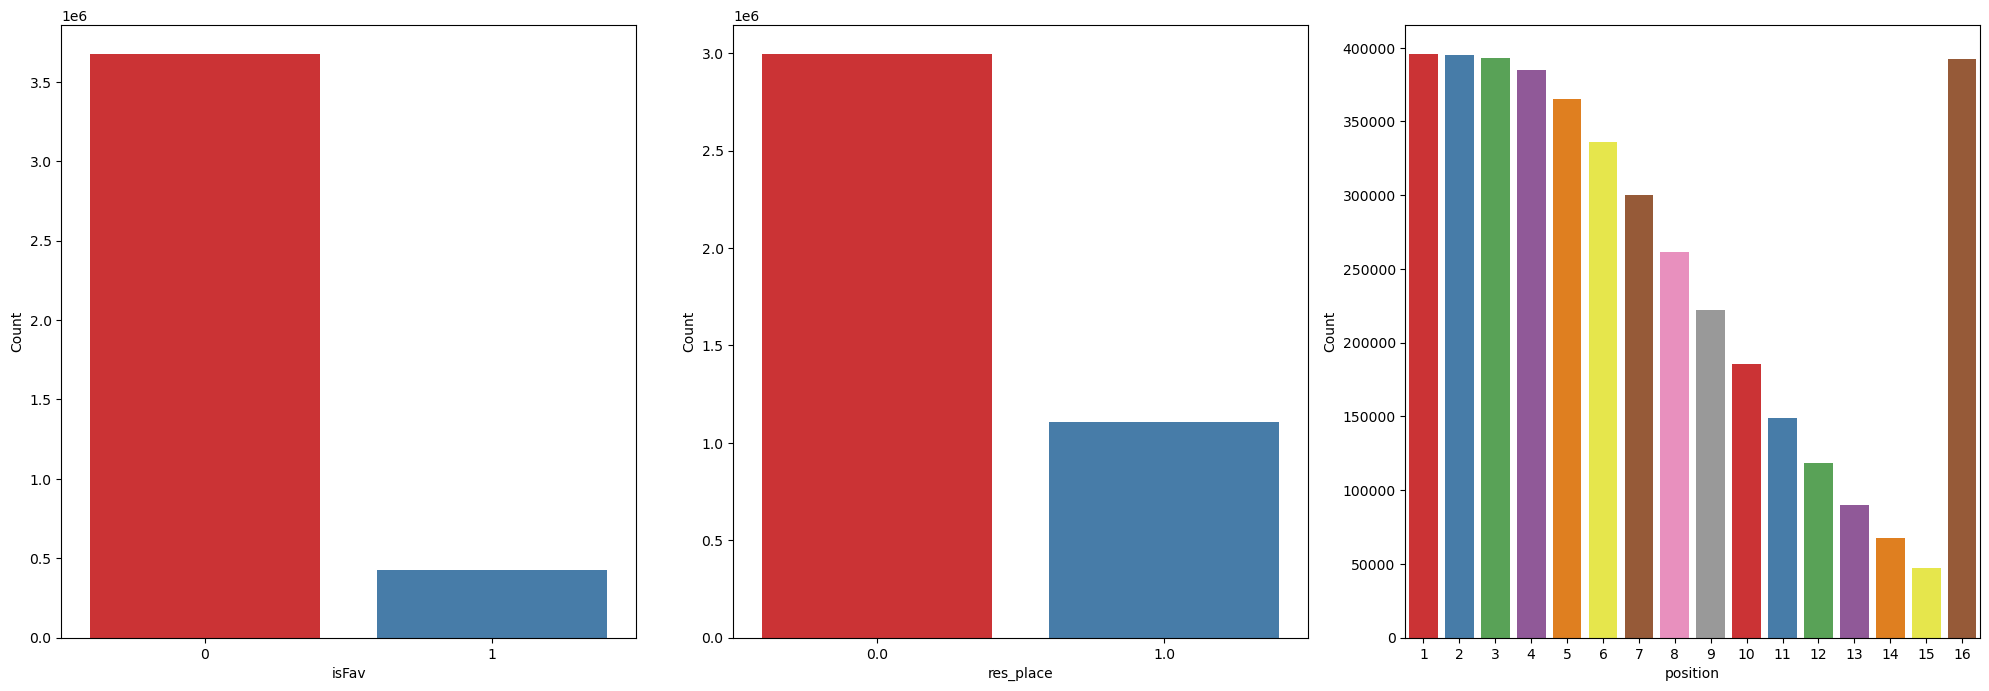

In [54]:
#Count of categories in each variable
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_columns:
    plt.subplot(3,3,ind)
    sns.countplot(x=df2[variable],palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

# Data is Imbalanced  

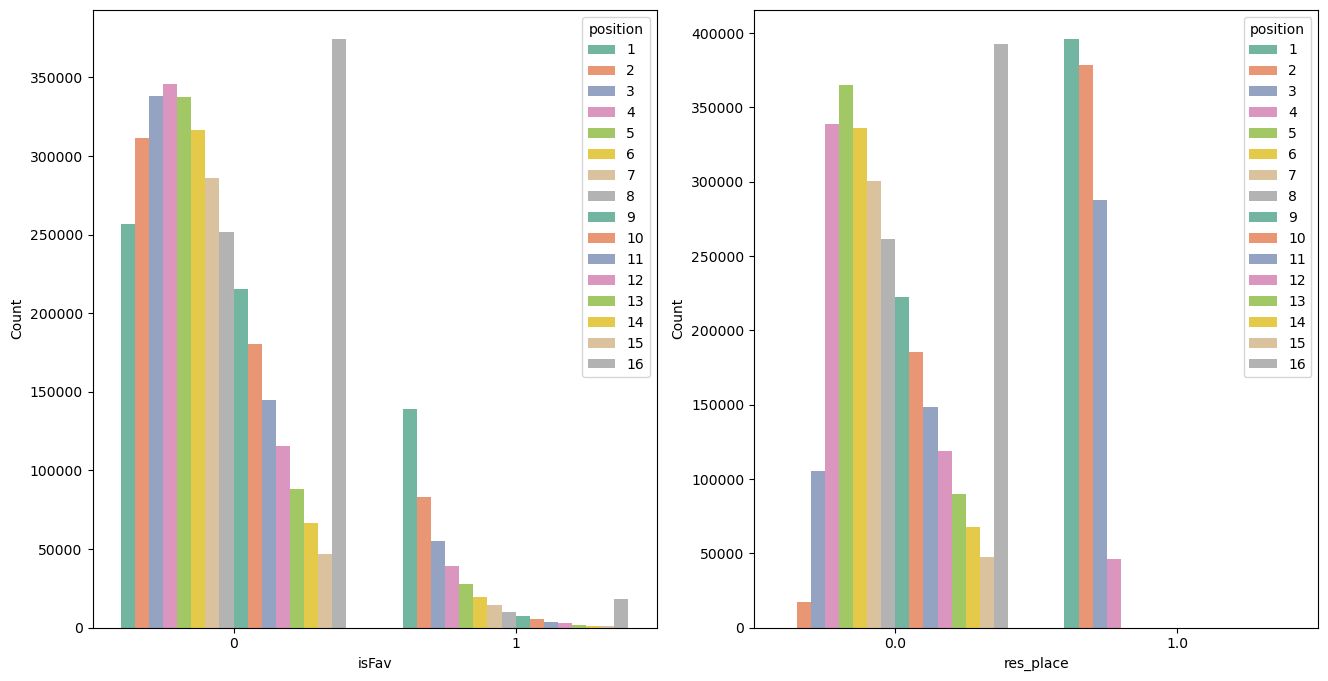

In [55]:
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_columns[:2]:
    plt.subplot(3,3,ind)
    sns.countplot(x=df2[variable],palette='Set2',hue=df2["position"])
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

In [56]:
Numerical_columns = ['age', 'weight', 'TR', 'distance_in_miles','position']

In [57]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()
    
    

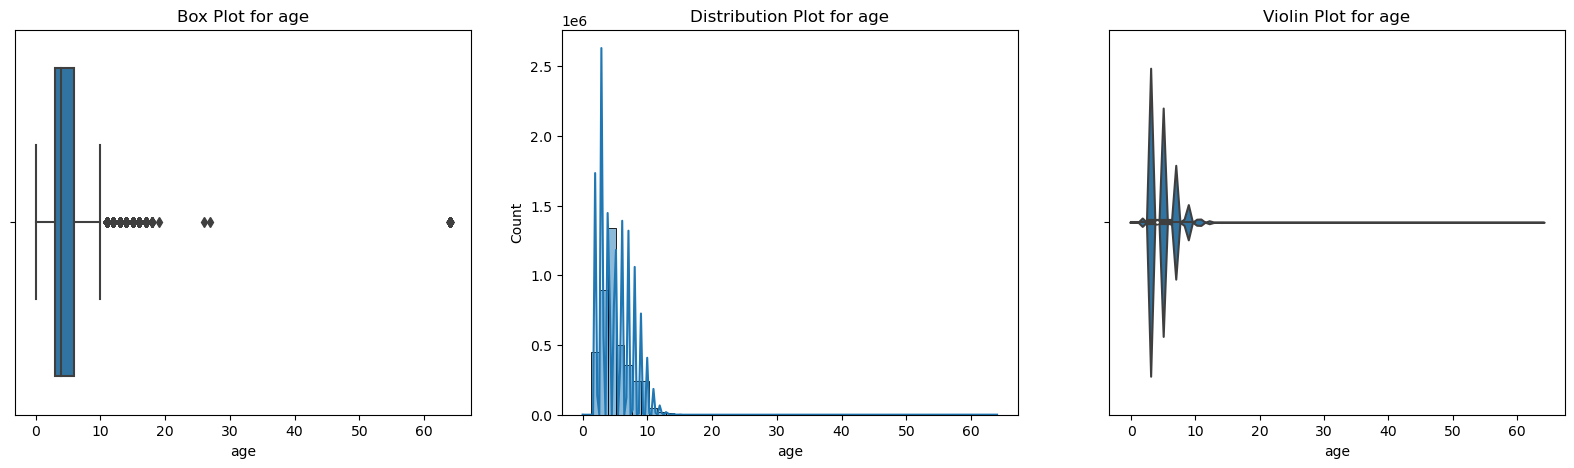

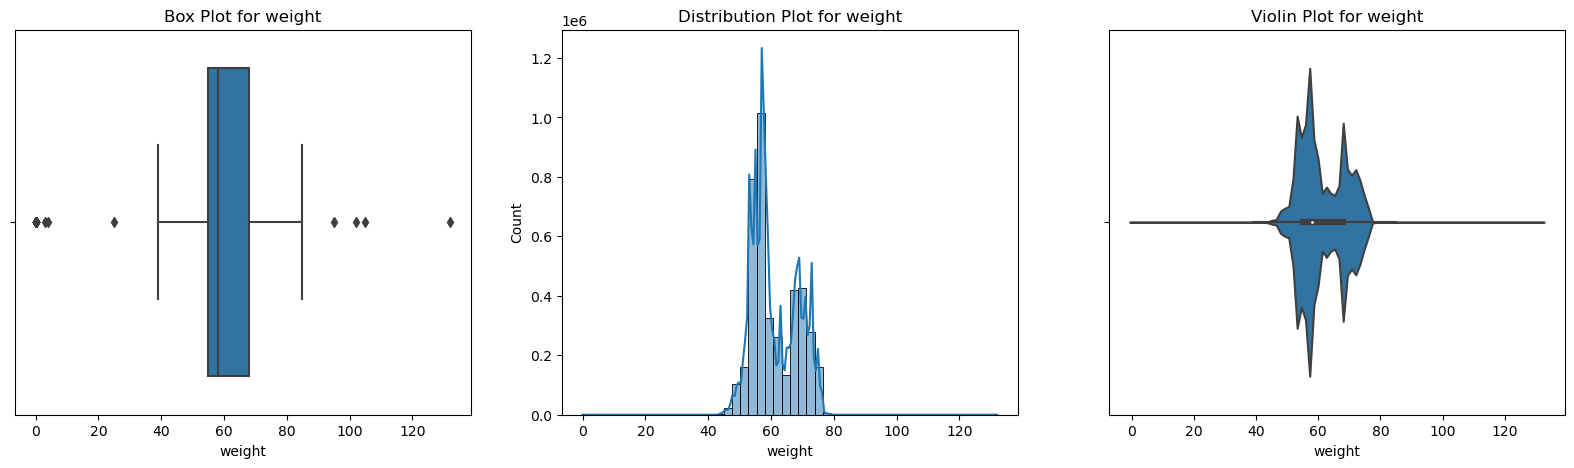

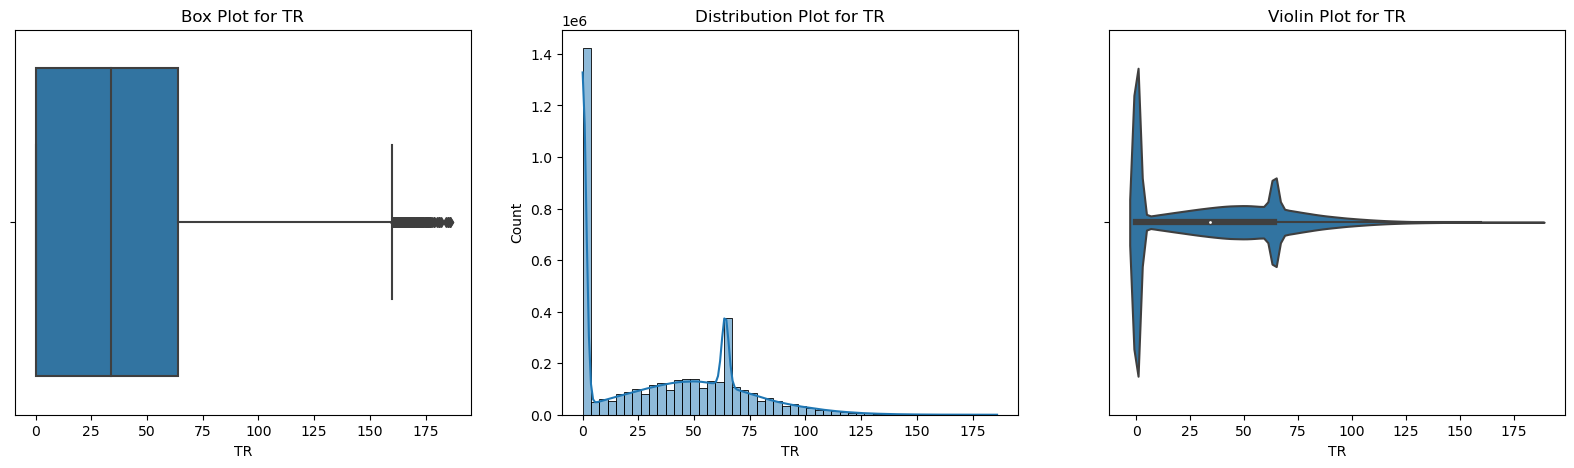

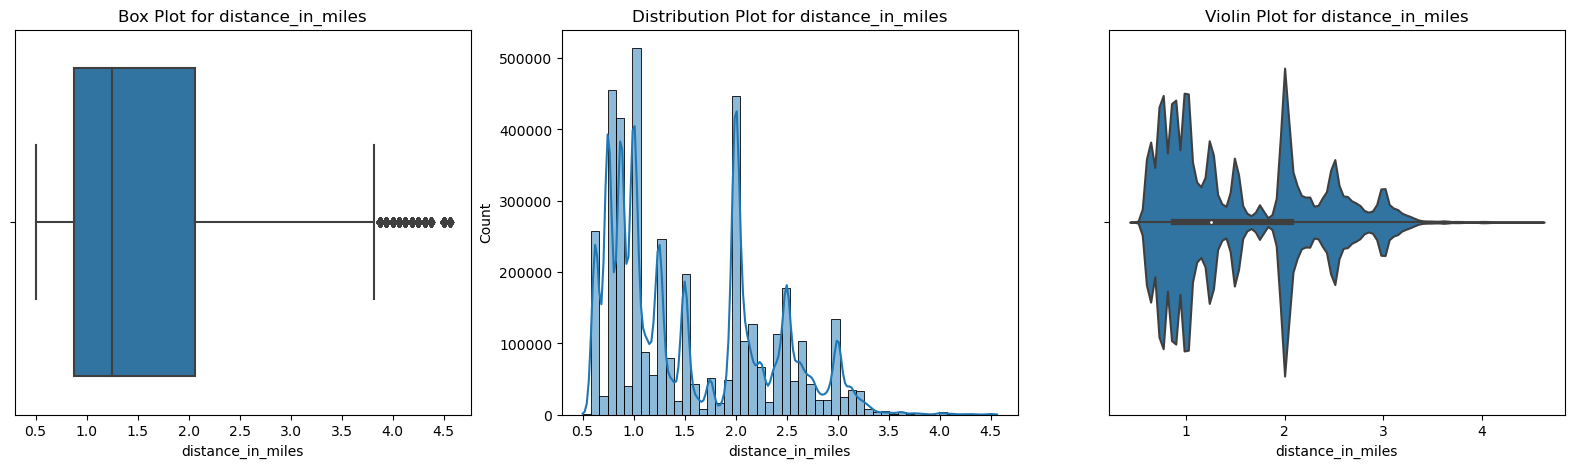

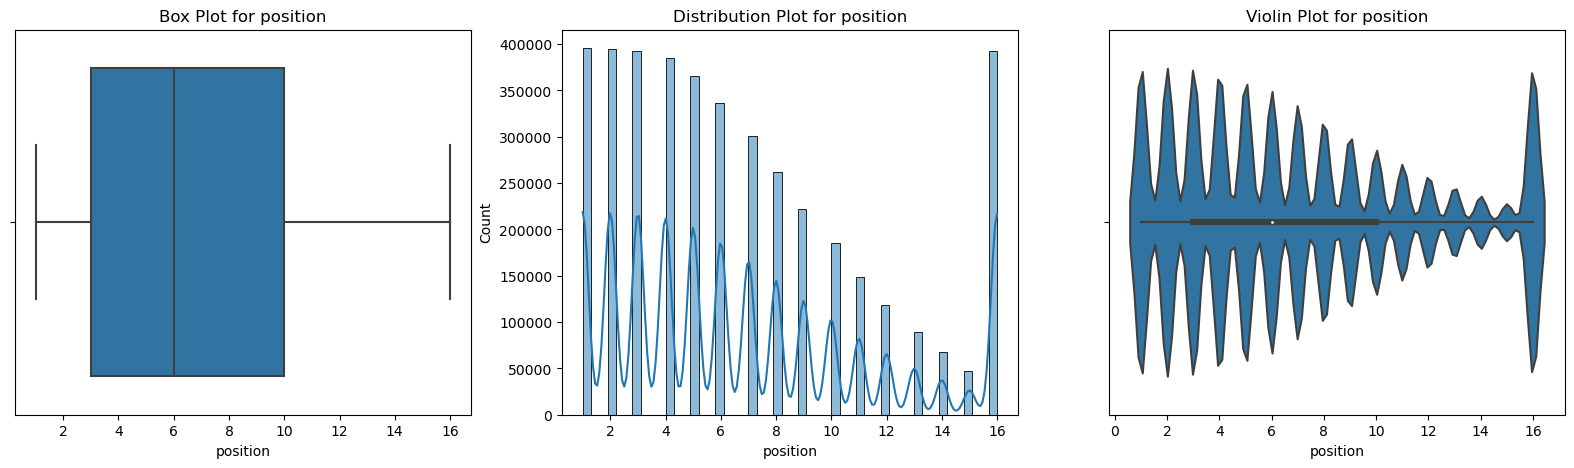

In [58]:
for i in Numerical_columns:
    plot(df2, i)

In [60]:
df2['TR'] = np.log1p(df2['TR'])

In [61]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [62]:
outlier(df2, 'age')
outlier(df2, 'weight')
outlier(df2, 'TR')
outlier(df2, 'runners')
outlier(df2, 'distance_in_miles')

In [63]:
column_cleaned = ['age','weight' ,'TR','runners','distance_in_miles']

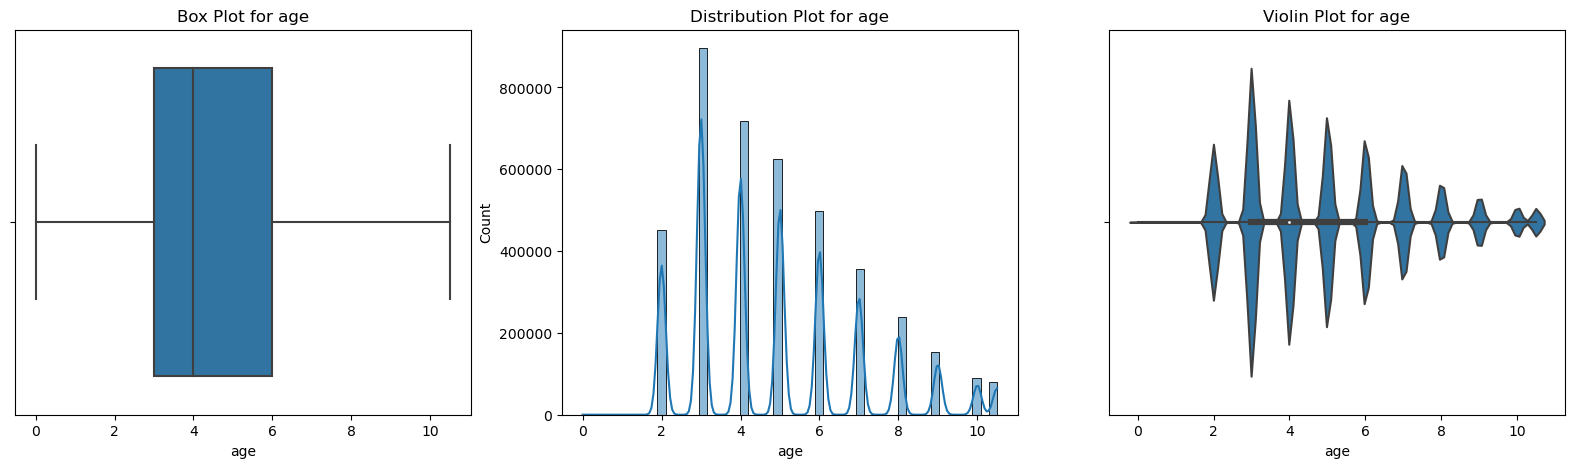

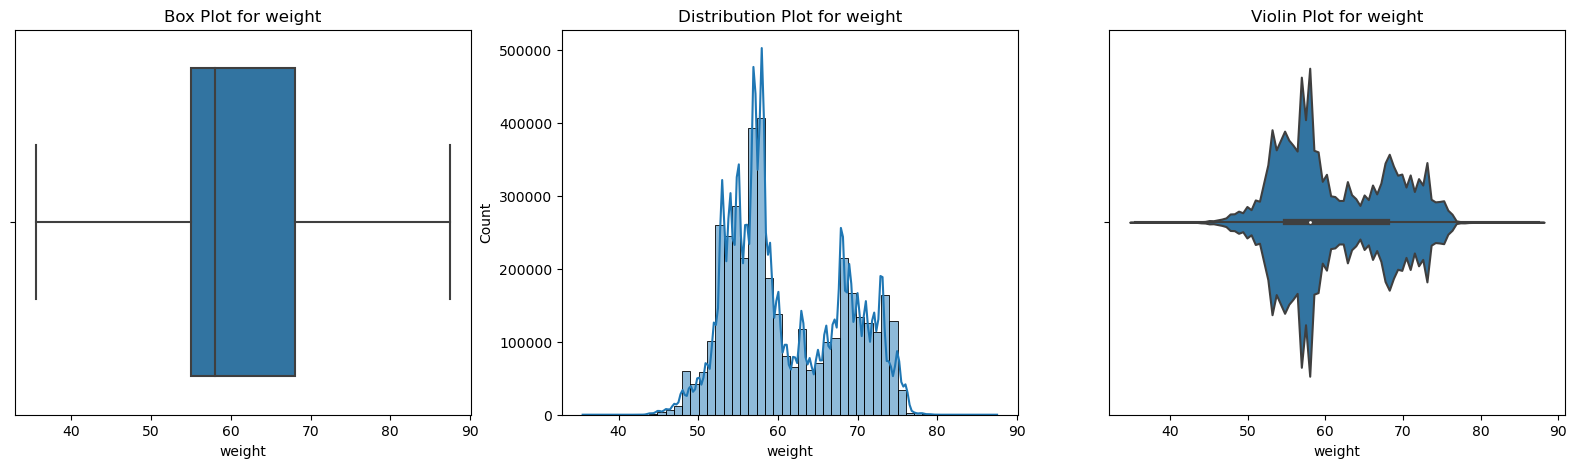

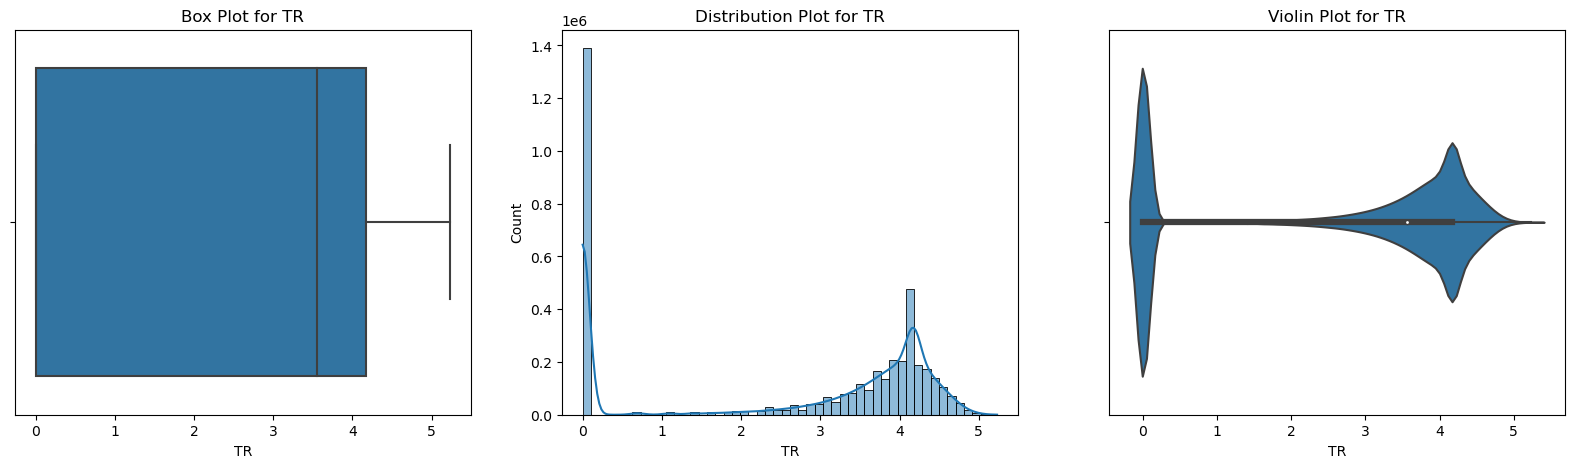

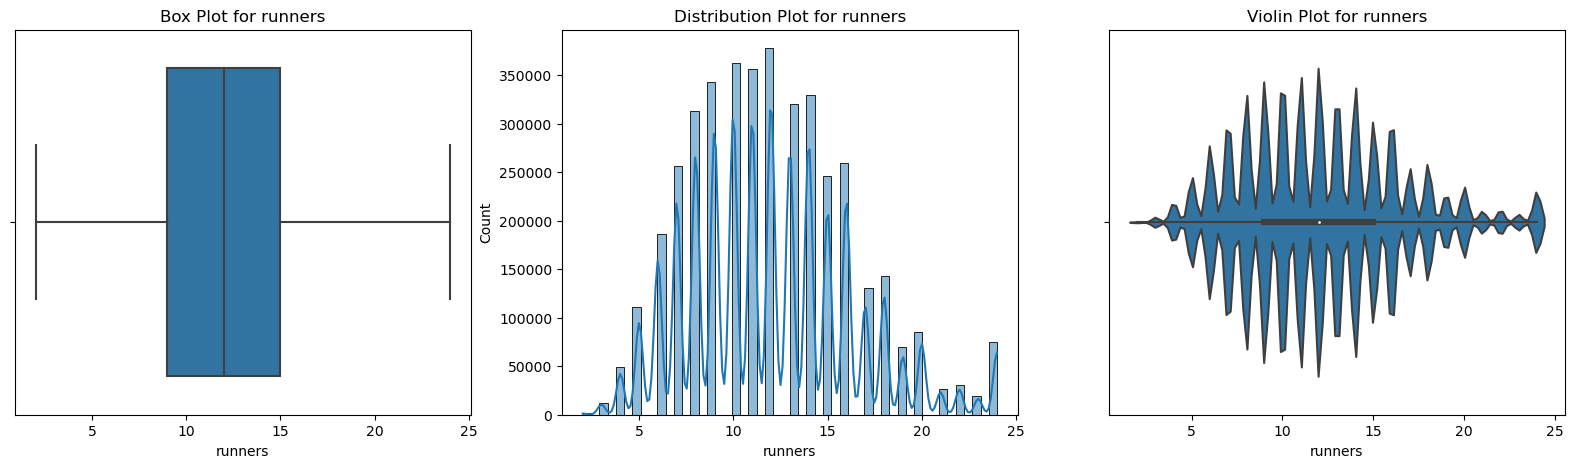

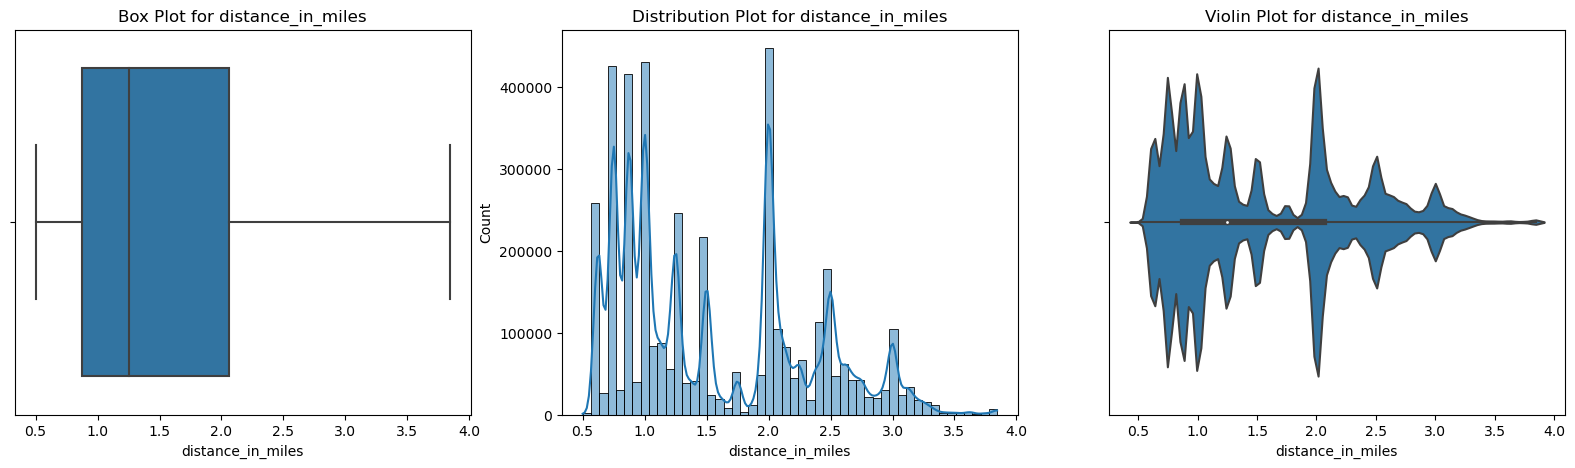

In [64]:
for i in column_cleaned:
    plot(df2, i)

In [65]:
df2.columns

Index(['age', 'trainerName', 'jockeyName', 'course', 'weight', 'TR', 'isFav',
       'runners', 'res_place', 'position', 'distance_in_miles'],
      dtype='object')

In [66]:
output_path = r"C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\Horse_race\combined_data\Horserace_ML.csv"

# Save df2 to the specified path
df2.to_csv(output_path, index=False)
